In [109]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement AdaBoost
import sklearn
from sklearn.ensemble import AdaBoostClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Package for generating confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

%matplotlib inline

In [110]:
ufc_df = pd.read_csv('ALL_weightclasses.csv')
ufc_df.head()

,Unnamed: 0,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0,-150.0,130,66.666667,130.000000,0,False,6,5,0,...,-0.53,0.6,-0.37,0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,1,170.0,-200,170.000000,50.000000,1,False,4,3,2,...,2.19,0.3,-1.48,2,450.0,350.0,700.0,1100.0,550.0,120.0
2,2,110.0,-130,110.000000,76.923077,1,False,5,3,1,...,-0.85,-1.6,-3.33,2,550.0,275.0,275.0,1400.0,600.0,185.0
3,3,-675.0,475,14.814815,475.000000,0,False,3,3,1,...,0.25,0.0,-1.57,2,175.0,900.0,500.0,3500.0,110.0,1100.0
4,4,-135.0,115,74.074074,115.000000,1,False,3,3,0,...,2.58,-0.6,-0.31,2,165.0,200.0,400.0,1200.0,900.0,600.0


In [111]:
#GET RID OF UNAMED COLUMN
ufc_df = ufc_df.drop(['Unnamed: 0'], axis = 1)
#CLEANING THE REST OF THE COLUMNS THAT HAD NO FEATURE IMPORTANCE
ufc_df = ufc_df.drop(["R_win_by_Decision_Majority",
"no_of_rounds",
"avg_sub_att_dif",
"R_Reach_cms",
"R_Weight_lbs",
"title_bout",
"b_sub_odds",
"lose_streak_dif",
"win_streak_dif",
"r_sub_odds",
"win_dif",
"weight_class",
"B_current_win_streak",
"total_title_bout_dif",
"ko_dif",
"R_Stance",
"height_dif",
"B_current_lose_streak",
"age_dif",
"better_rank",
"sig_str_dif",
"sub_dif",
"R_win_by_Submission",
"R_wins",
"R_current_win_streak",
"B_longest_win_streak",
"B_win_by_Decision_Majority",
"B_win_by_Decision_Split",
"B_win_by_Decision_Unanimous",
"B_win_by_Submission",
"B_win_by_TKO_Doctor_Stoppage",
"B_wins",
"B_Stance",
"B_Height_cms",
"B_Weight_lbs",
"R_current_lose_streak",
"R_draw",
"R_win_by_TKO_Doctor_Stoppage",
"B_avg_TD_landed",
"R_avg_SIG_STR_pct",
"B_avg_SUB_ATT",
"R_avg_TD_landed",
"R_avg_TD_pct",
"R_losses",
"R_total_rounds_fought",
"R_total_title_bouts",
"R_win_by_Decision_Split",
"R_win_by_KO/TKO",
"B_total_rounds_fought",
"R_longest_win_streak"
], axis = 1)
ufc_df

,R_odds,B_odds,R_ev,B_ev,Winner,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_TD_pct,B_losses,...,B_age,longest_win_streak_dif,loss_dif,total_round_dif,reach_dif,avg_td_dif,r_dec_odds,b_dec_odds,r_ko_odds,b_ko_odds
0,-150.0,130,66.666667,130.000000,0,0,3.420000,0.590000,1.000000,2,...,29,0,-6,-32,15.24,-0.370000,800.0,900.0,-110.0,175.0
1,170.0,-200,170.000000,50.000000,1,0,5.160000,0.420000,0.220000,5,...,32,-2,-3,-20,0.00,-1.480000,450.0,350.0,550.0,120.0
2,110.0,-130,110.000000,76.923077,1,0,2.920000,0.410000,0.340000,5,...,32,1,1,25,0.00,-3.330000,550.0,275.0,600.0,185.0
3,-675.0,475,14.814815,475.000000,0,0,4.040000,0.340000,0.000000,1,...,32,-2,-2,-12,-5.08,-1.570000,175.0,900.0,110.0,1100.0
4,-135.0,115,74.074074,115.000000,1,0,5.220000,0.560000,0.390000,3,...,33,-2,3,11,-5.08,-0.310000,165.0,200.0,900.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,130.0,-140,130.000000,71.428571,0,0,83.500000,0.630000,0.500000,1,...,32,-1,2,-6,-2.54,0.166667,378.0,411.0,450.0,150.0
3090,150.0,-160,150.000000,62.500000,0,0,24.000000,0.327500,0.430833,2,...,28,2,3,-5,-12.70,0.650000,309.0,135.0,1330.0,632.0
3091,123.0,-133,123.000000,75.187970,1,0,28.000000,0.635000,0.265000,1,...,28,-1,4,-27,-10.16,0.950000,240.0,200.0,575.0,265.0
3092,-210.0,190,47.619048,190.000000,1,0,26.416667,0.416667,0.220000,4,...,28,0,-2,7,5.08,-1.111111,325.0,665.0,1195.0,460.0


## Prepare the Data

In [112]:
# Selecting data correponding to Input Features X and Outcome y
X = ufc_df.drop(columns=['Winner'])
y = ufc_df['Winner']


# Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

# (A) Implementing AdaBoost for Classification

## Hyperparameters of AdaBoost

In [113]:
# Define your model
classifier = AdaBoostClassifier(algorithm = 'SAMME', random_state = 42)

# Start with an initial guess for parameters
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]

learning_rate = [x for x in np.arange(0.1, 2.1, 0.1)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
}

pprint(random_grid)

{'learning_rate': [0.1,
                   0.2,
                   0.30000000000000004,
                   0.4,
                   0.5,
                   0.6,
                   0.7000000000000001,
                   0.8,
                   0.9,
                   1.0,
                   1.1,
                   1.2000000000000002,
                   1.3000000000000003,
                   1.4000000000000001,
                   1.5000000000000002,
                   1.6,
                   1.7000000000000002,
                   1.8000000000000003,
                   1.9000000000000001,
                   2.0],
 'n_estimators': [5, 60, 115, 170, 225, 280, 335, 390, 445, 500]}


In [114]:
# Creating stratified folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [115]:
# Call RandomizedSearchCV()
random_cv = RandomizedSearchCV(estimator = classifier, 
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro', 
                              cv = folds, 
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

# Fit the model
start = time.time()            # Start Time
random_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training time: 115.24014639854431s


In [116]:
print('Initial score: ', random_cv.best_score_)
print('Initial parameters: ', random_cv.best_params_)

Initial score:  0.6219356874152295
Initial parameters:  {'n_estimators': 170, 'learning_rate': 1.5000000000000002}


In [118]:
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [130, 140, 160, 170, 180, 190],
              'learning_rate': [1.2, 1.50, 1.8]
}

pprint(param_grid)

{'learning_rate': [1.2, 1.5, 1.8],
 'n_estimators': [130, 140, 160, 170, 180, 190]}


In [119]:
# Call GridSearchCV()
grid_cv = GridSearchCV(estimator = classifier, 
                        param_grid = param_grid, 
                        scoring= 'f1_macro', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 


# Fit the model
start = time.time()            # Start Time
grid_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Training time: 14.384464263916016s


In [120]:
print('Improved score: ', grid_cv.best_score_)
print('Improved parameters: ', grid_cv.best_params_)

Improved score:  0.6246181864177535
Improved parameters:  {'learning_rate': 1.5, 'n_estimators': 180}


### Analyzing the performance of each stump in the ensemble

**Total Error of each stump**: Sum of weights associated with incorrectly classified instances

In [121]:
# Error of each stump
grid_cv.best_estimator_.estimator_errors_

array([0.38060046, 0.35707851, 0.42437576, 0.45072762, 0.45884549,
       0.44529215, 0.4633173 , 0.44424827, 0.4607916 , 0.45312129,
       0.46179574, 0.48086231, 0.47269788, 0.4702267 , 0.46720337,
       0.47815575, 0.48035611, 0.48244488, 0.48669215, 0.4889934 ,
       0.49028513, 0.48706387, 0.48388832, 0.48654777, 0.48864293,
       0.48987198, 0.49098975, 0.48795821, 0.48670779, 0.47667666,
       0.47444744, 0.47939374, 0.47930192, 0.48210614, 0.48712611,
       0.48917202, 0.49036755, 0.48761451, 0.48684415, 0.48988057,
       0.47236533, 0.46203273, 0.4672445 , 0.46528513, 0.46797598,
       0.47400003, 0.48254056, 0.48796002, 0.4907882 , 0.49027547,
       0.49025006, 0.49120174, 0.47606721, 0.47475077, 0.47992405,
       0.48278191, 0.4697858 , 0.46860766, 0.48923971, 0.4869405 ,
       0.46754554, 0.4708348 , 0.48294035, 0.48855326, 0.49120314,
       0.49260818, 0.49195516, 0.48891161, 0.48878163, 0.48503679,
       0.4839181 , 0.48662381, 0.48725477, 0.49030568, 0.49110

In [122]:
# Stump Weightage
grid_cv.best_estimator_.estimator_weights_

array([0.73050053, 0.88210043, 0.45725372, 0.29659684, 0.24748699,
       0.32956652, 0.22049235, 0.33590712, 0.2357344 , 0.28210079,
       0.22967323, 0.11488229, 0.16397585, 0.17885138, 0.19706274,
       0.13114897, 0.11792403, 0.10537405, 0.07986596, 0.06605029,
       0.05829657, 0.07763408, 0.09670357, 0.08073289, 0.06815416,
       0.06077644, 0.05406735, 0.07226472, 0.07977204, 0.14004166,
       0.15344902, 0.12370765, 0.12425949, 0.10740903, 0.0772604 ,
       0.06497802, 0.05780187, 0.07432817, 0.0789533 , 0.06072485,
       0.16597715, 0.228243  , 0.19681488, 0.2086249 , 0.19240751,
       0.15614065, 0.10479926, 0.07225387, 0.05527704, 0.05835452,
       0.05850705, 0.05279502, 0.14370657, 0.15162432, 0.12052049,
       0.10334938, 0.18150633, 0.18860212, 0.06457168, 0.0783748 ,
       0.19500094, 0.17519005, 0.10239766, 0.06869243, 0.05278661,
       0.04435415, 0.04827323, 0.06654124, 0.06732153, 0.08980605,
       0.0965247 , 0.08027629, 0.07648798, 0.05817321, 0.05335

### Make a Pickle File

In [123]:
import pickle

filename = 'ALLweightclassesCLEAN_boosting_pickle.sav'
pickle.dump(grid_cv, open(filename, 'wb'))

filename = 'ALLweightclassesCLEAN_boosting_pickle.sav'
loaded_model = pickle.load(open(filename, 'rb'))

**Making predictions on test set**

In [124]:
# Predictions on test set
y_pred = grid_cv.predict(test_X)

# Generating Classification Report
print("Classification Report - \n", 
      classification_report(test_y, y_pred))

Classification Report - 
               precision    recall  f1-score   support

           0       0.65      0.73      0.68       526
           1       0.58      0.48      0.53       403

    accuracy                           0.62       929
   macro avg       0.61      0.61      0.61       929
weighted avg       0.62      0.62      0.62       929



**Generating Confusion Matrix**

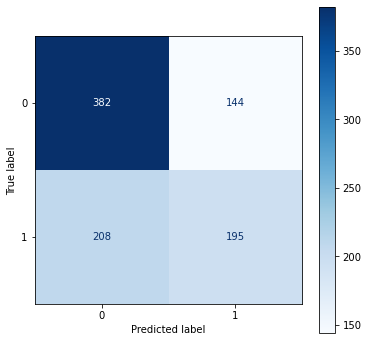

In [125]:
# Specifying figure size
fig, ax = plt.subplots(figsize=(6, 6)) 

# Generating confusion matrix
plot_confusion_matrix(grid_cv, test_X, test_y,
                      cmap = plt.cm.Blues,
                      values_format = '',
                      ax = ax);

**Estimating Prediction Probabilites**

In [126]:
# Getting prediction probabilites
prob = grid_cv.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for rejection and acceptance prob.
result[['Prob. of 0','Prob. of 1']] = pd.DataFrame(prob.tolist(), index = result.index)

# Saving dataframe as a csv file
#result.to_csv('Prediction Results.csv', index = False)

**Feature Importance**

In [127]:
# Storing importance values from the best fit model
importance = grid_cv.best_estimator_.feature_importances_

In [128]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

print(feature_imp.tail(50))

                        Feature  Importance
0                    avg_td_dif    0.136051
1                    r_dec_odds    0.106705
2                          R_ev    0.084911
3                        R_odds    0.070910
4          R_avg_SIG_STR_landed    0.070421
5                        B_odds    0.066711
6                     b_ko_odds    0.049693
7               total_round_dif    0.046783
8                          B_ev    0.046405
9               B_win_by_KO/TKO    0.042169
10                        B_age    0.040869
11                R_avg_SUB_ATT    0.029545
12                    r_ko_odds    0.028919
13                   b_dec_odds    0.028483
14            B_avg_SIG_STR_pct    0.021363
15                    reach_dif    0.016935
16                       B_draw    0.014504
17  R_win_by_Decision_Unanimous    0.014383
18         B_avg_SIG_STR_landed    0.014312
19          B_total_title_bouts    0.012955
20                 R_Height_cms    0.012151
21                  B_Reach_cms 

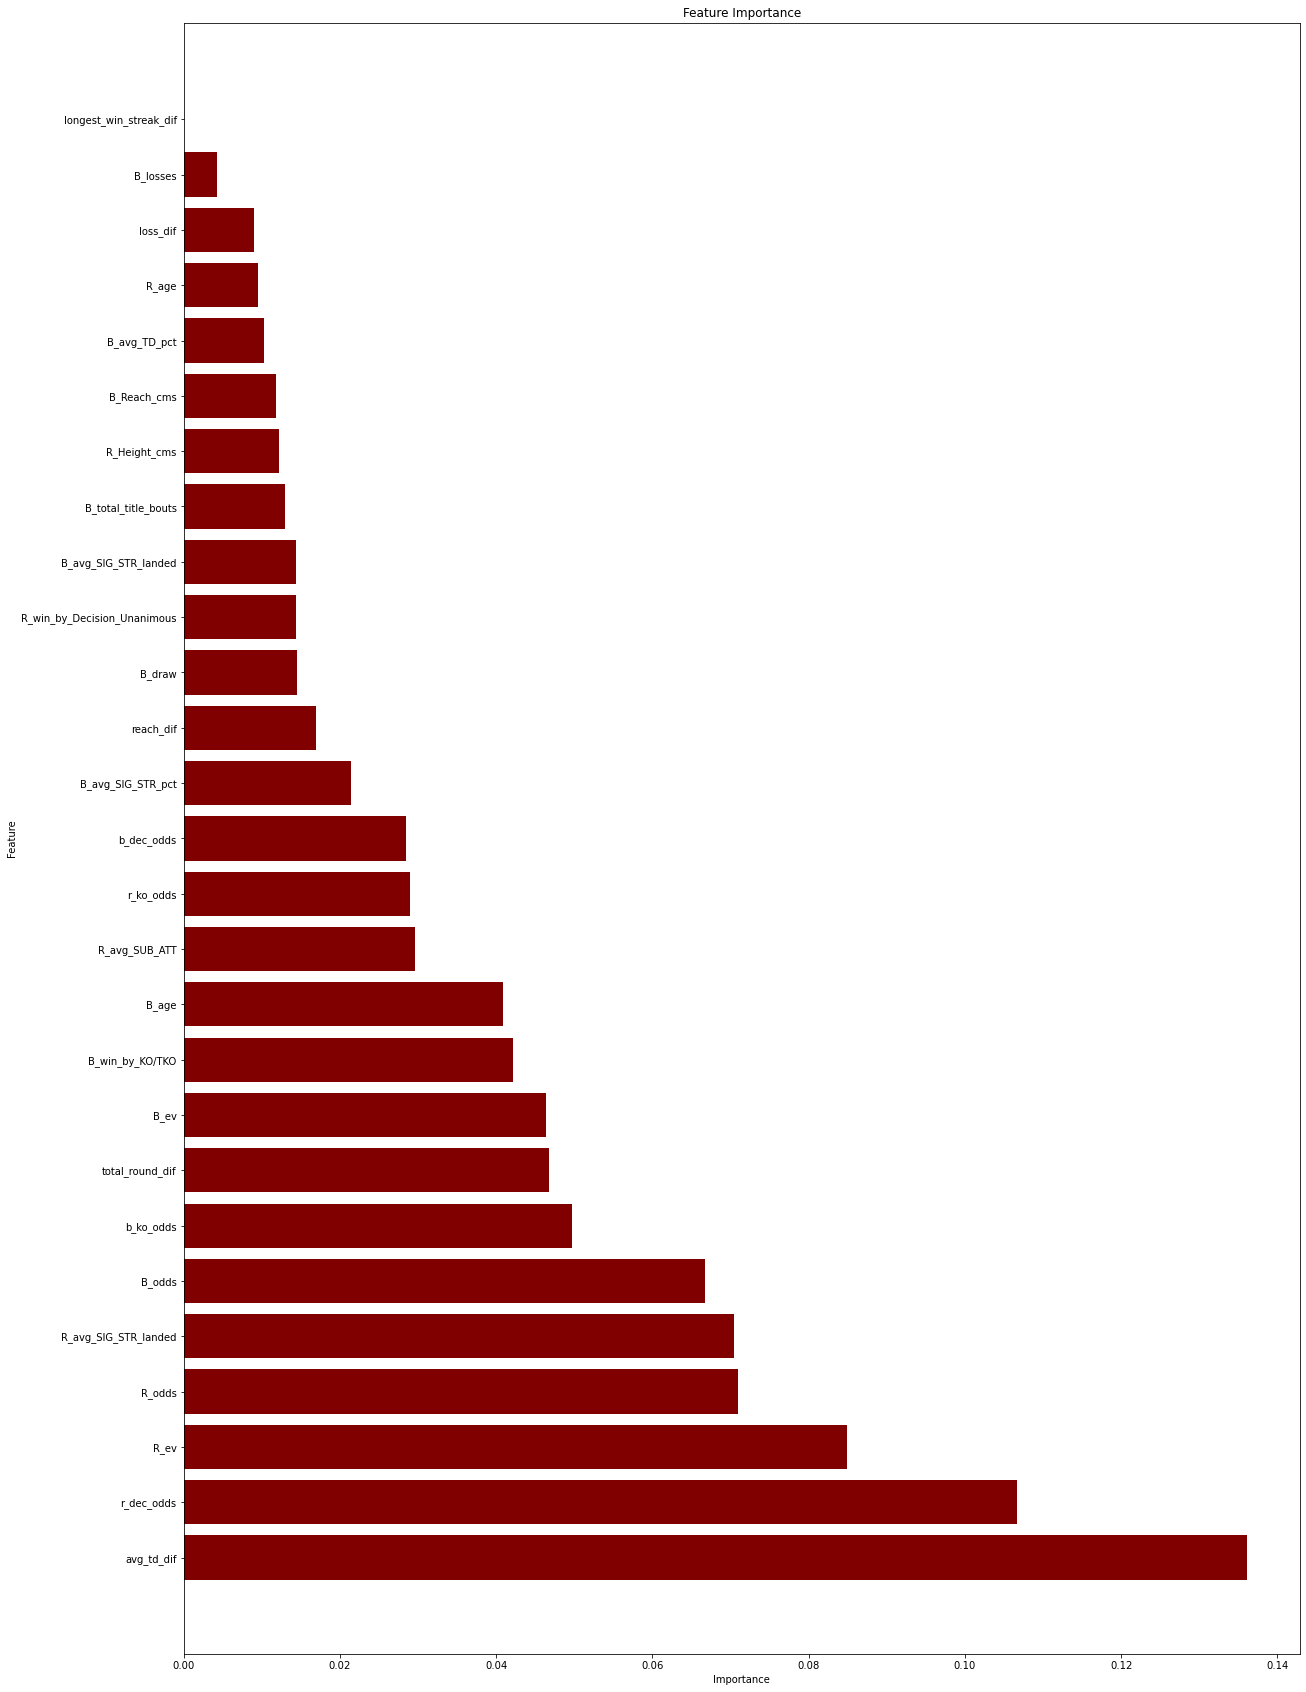

In [129]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
plt.savefig('ALLweightclassesCLEANED_boosting_plot.png')